# **Feasibility of a Simple Patient Preference Predictor for Decisional Incapacity** 
### Which Patients Prioritize Involving Their Family Over Receiving Preferred Treatments?
EJ Jardas | NIH Department of Bioethics

<div>
<img src="titleimage.jpg" width="400"/>
</div>

### **Background**

Clinical practice frequently involves incapacitated patients. Up to:
- **40%** of hospitalized adults
- **70%** of older adults who require treatment decisions
- **95%** of critically ill adults

are unable to make their own treatment decisions due to decisional incapacity (Lepping, Stanly, & Turner, 2015).

**Who should make the decisions on behalf of these patients, and how should they make them?**
- Surrogates (patient-designated or next-of-kin) should make these decisons by trying to guess what treatment their loved one would want.
- This is called the *substituted judgment standard*.
- This methodology aims to promote the autonomy of the patient (Buchanan & Brock, 1989; Beauchamp & Childress, 2013).

**In other words, the primary goal of involving a surrogate in treatment decision-making is to represent the preferences and values of the patient, to help them receive wanted and avoid unwanted treatments.**
- Indeed, 95.5% of patients endorse the goal of receiving wanted and avoiding unwanted treatments (Rid et al., 2015).

**However, there is a huge problem with this approach.** 
- Family member surrogates only accurately identify the patient's treatment preferences about one-half of the time when no treatment clearly promotes the patient’s best clinical interests (Shalowitz, Garrett-Mayer, & Wendler, 2006).

**Furthermore, when 1,169 patients were asked which of 8 goals they prioritized most,**
- only 38.5% chose receiving desired and avoiding undesired treatments
- 20.0% chose minmizing the burden on their family
- 14.6% chose involving their family in the decision
- 20.0% could not choose any one priority.

**This is a serious problem because the current process promotes only the first of the above goals, despite the fact that this goal is not prioritized by a majority of patients. (Indeed, there is no overall majority.) This leaves two questions.**
- Can we promote all 3 goals at once, so that the process serves all patients?
- Can we somehow deduce which process a particular patient prefers?



# **Problem Statement: Can we predict which patients prioritize involving their family over receiving preferred treatments?**

## **Method**

### Population
- 1,169 patients were surveyed from the George Washington University Hospital, across a variety 6 inpatient and outpatient units or clinics

### Outcome Variable
If your family does not know which treatments you would want, would you still want your family to help your doctors make treatment decisions for you?
- Yes, help doctors decide
- No, do not help doctors decide

### Features
- 16 variables including demographics, health information, and relevant experiences 

### Model 
- A decision tree classifier, with hyperparameters tuned via gridsearch
- 10 fold stratified cross validation
- Performance evaluated by ROC curve analyses

# **Import, Clean, and Preprocess Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sklearn

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn import tree

### Note
That I imported, explored, and cleaned my own dataset here during this section. I deleted all missing values, calculated descriptive statistics, created dummy variables, and prepared the outcome variable. Please see the notebook 'final-project-truedata', in this repository, to see the process.

### Make Classification
Because my data is confidential, I cannot post it on GitHub, but I will now make classifications instead so that anyone can test and run this notebook.

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 753,
                           n_features = 57,
                          n_informative = 16,
                          n_classes=2,
                          weights = [.78, .22], 
                          flip_y = .20, 
                          random_state = 6)
X = pd.DataFrame(data=X)
y = pd.Series(data=y)
print(X.shape)
print(y.shape)

(753, 57)
(753,)


In [3]:
X.columns = ['age', 'relationhip_status_Divorced', 'relationhip_status_Married', 'relationhip_status_Partnered', 'relationhip_status_Separated', 'relationhip_status_Single', 'relationhip_status_Widowed', 'gender_Female', 'gender_Male', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_Mixed', 'race_NatAmer', 'race_White', 'education_College', "education_Didn'tCompleteGradeSchool", 'education_GradSchool', 'education_GradeSchool', 'education_HighSchool', 'income_$100-250K', 'income_$25-50K', 'income_$50-100K', 'income_<$25K', 'income_>$250K', 'current_health_Excellent', 'current_health_Fair', 'current_health_Good', 'current_health_Poor', 'current_health_VeryGood', 'current_qol_Excellent', 'current_qol_Fair', 'current_qol_Good', 'current_qol_Poor', 'current_qol_VeryGood', 'reg_doctor_No', 'reg_doctor_Yes', "qualityof_familyrelationship_Don'tHaveFamily", 'qualityof_familyrelationship_Excellent', 'qualityof_familyrelationship_Fair', 'qualityof_familyrelationship_Good', 'qualityof_familyrelationship_Poor', 'qualityof_familyrelationship_VeryGood', 'religiosity_LittleReligious', 'religiosity_ModeratelyReligious', 'religiosity_NotReligious', 'religiosity_VeryReligious', 'experienced_incap_adults_Little', 'experienced_incap_adults_Lot', 'experienced_incap_adults_ModerateAmt', 'experienced_incap_adults_None', 'experienced_ACP_N', 'experienced_ACP_Y', 'have_will_N', 'have_will_Y', 'have_dpa_N', 'have_dpa_Y']
X.head()

,age,relationhip_status_Divorced,relationhip_status_Married,relationhip_status_Partnered,relationhip_status_Separated,relationhip_status_Single,relationhip_status_Widowed,gender_Female,gender_Male,race_Asian,...,experienced_incap_adults_Little,experienced_incap_adults_Lot,experienced_incap_adults_ModerateAmt,experienced_incap_adults_None,experienced_ACP_N,experienced_ACP_Y,have_will_N,have_will_Y,have_dpa_N,have_dpa_Y
0,-2.610669,0.004559,5.176040,-0.711258,0.036737,-2.271575,1.003158,3.659252,0.038365,0.300067,...,-0.756924,-1.493575,7.039241,-1.013007,4.369458,1.600003,5.865377,-0.153921,-1.013002,2.063493
1,-4.033385,0.169078,-3.555674,-0.423946,-0.956883,1.217759,1.474863,0.692384,-3.179759,0.013523,...,1.198865,-0.183253,0.167589,1.039803,-0.516649,0.889238,-1.057271,1.018790,-0.102354,1.269772
2,6.450618,0.001198,-2.616326,-0.913800,-0.500491,-1.070443,-0.905710,-5.052314,1.475884,0.419514,...,0.147823,-1.398911,1.705588,0.366347,-2.260951,0.637118,-3.594807,-1.565743,2.415615,-0.752284
3,-1.976564,0.570839,-1.608849,-2.397728,-0.621817,1.468343,-0.714967,1.626510,-1.021801,-0.314611,...,-1.248712,-0.370340,1.282663,0.679993,-1.078240,0.453710,1.850024,0.036157,0.284125,2.425571
4,2.605861,0.054353,1.860517,2.418627,-1.736231,3.037296,-0.405959,3.648358,0.348622,-1.550075,...,-0.352574,-0.888278,-1.906439,0.518368,5.089366,-0.140743,-3.476236,0.630337,-0.103061,4.431435


# **Machine Learning:** The Fun Begins
### Generate 67-33 Train-Test Split, Stratifying over Class

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True,
                                                    random_state=66, 
                                                    stratify=y)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [5]:
print(len(y_train))
print(len(y_test))
print("Training Set:")
print(y_train.value_counts())
print("Test Set:")
print(y_test.value_counts())

504
249
Training Set:
0    370
1    134
dtype: int64
Test Set:
0    183
1     66
dtype: int64


### Define Dictionary of Hyperparameters to Be Tuned

In [6]:
to_be_tuned = {'max_depth': range(1,58),
               'min_samples_split': [10, 20, 40, 50, 75, 100]}

### Instantiate Decision Tree Classifier and Grid Search

In [7]:
tree = DecisionTreeClassifier(criterion='entropy')
search = GridSearchCV(estimator = tree,
                     param_grid = to_be_tuned,
                     scoring = 'roc_auc',
                     cv = 10,
                     n_jobs = -1)

### Train the Model

In [8]:
search.fit(X_train, y_train) 

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 58),
                        

### Explore the GridSearch Results

In [9]:
cv_df = pd.DataFrame(search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020573,0.004496,0.005900,0.003790,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.547297,0.600386,0.592664,0.565637,0.514553,0.634096,0.503119,0.659044,0.60499,0.600832,0.582262,0.047146,68
1,0.022719,0.007893,0.005515,0.002849,1,20,"{'max_depth': 1, 'min_samples_split': 20}",0.547297,0.600386,0.592664,0.565637,0.514553,0.634096,0.503119,0.659044,0.60499,0.600832,0.582262,0.047146,68
2,0.022297,0.009880,0.004885,0.002083,1,40,"{'max_depth': 1, 'min_samples_split': 40}",0.547297,0.600386,0.592664,0.565637,0.514553,0.634096,0.503119,0.659044,0.60499,0.600832,0.582262,0.047146,68
3,0.019893,0.004309,0.005360,0.001925,1,50,"{'max_depth': 1, 'min_samples_split': 50}",0.547297,0.600386,0.592664,0.565637,0.514553,0.634096,0.503119,0.659044,0.60499,0.600832,0.582262,0.047146,68
4,0.022690,0.009766,0.005583,0.001840,1,75,"{'max_depth': 1, 'min_samples_split': 75}",0.547297,0.600386,0.592664,0.565637,0.514553,0.634096,0.503119,0.659044,0.60499,0.600832,0.582262,0.047146,68


### Create Heatmap for GridSearch Hyperparameters

In [10]:
pivoted_df = cv_df.pivot(index="param_min_samples_split",
           columns="param_max_depth",
           values="mean_test_score").round(3)
pivoted_df.style.background_gradient(
    cmap="nipy_spectral",
    axis=None
)

param_max_depth,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
param_min_samples_split,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,0.582,0.588,0.588,0.543,0.544,0.538,0.544,0.538,0.55,0.559,0.536,0.538,0.545,0.543,0.534,0.52,0.53,0.546,0.537,0.542,0.547,0.535,0.536,0.54,0.53,0.557,0.539,0.54,0.55,0.525,0.538,0.544,0.54,0.537,0.537,0.534,0.516,0.543,0.539,0.537,0.527,0.534,0.554,0.543,0.544,0.538,0.539,0.548,0.547,0.524,0.537,0.54,0.547,0.535,0.518,0.534,0.541
20,0.582,0.588,0.587,0.536,0.54,0.53,0.535,0.53,0.53,0.519,0.526,0.529,0.529,0.541,0.537,0.534,0.536,0.516,0.547,0.544,0.547,0.536,0.553,0.522,0.53,0.541,0.538,0.548,0.535,0.534,0.521,0.52,0.521,0.547,0.529,0.535,0.538,0.535,0.516,0.529,0.537,0.526,0.533,0.535,0.534,0.553,0.533,0.528,0.523,0.532,0.526,0.539,0.522,0.533,0.527,0.531,0.538
40,0.582,0.588,0.593,0.557,0.542,0.548,0.553,0.553,0.533,0.539,0.555,0.547,0.554,0.533,0.554,0.56,0.55,0.553,0.543,0.55,0.551,0.557,0.544,0.539,0.552,0.54,0.545,0.555,0.545,0.54,0.55,0.553,0.552,0.554,0.548,0.539,0.561,0.539,0.541,0.545,0.557,0.56,0.547,0.549,0.546,0.547,0.552,0.534,0.544,0.544,0.55,0.533,0.547,0.548,0.546,0.553,0.544
50,0.582,0.588,0.599,0.572,0.561,0.55,0.553,0.563,0.555,0.555,0.553,0.554,0.561,0.551,0.554,0.554,0.563,0.555,0.551,0.553,0.551,0.559,0.558,0.558,0.554,0.558,0.55,0.555,0.554,0.559,0.553,0.554,0.554,0.555,0.554,0.558,0.558,0.551,0.558,0.554,0.558,0.551,0.553,0.553,0.563,0.55,0.561,0.555,0.559,0.557,0.561,0.55,0.558,0.551,0.563,0.554,0.55
75,0.582,0.588,0.598,0.58,0.583,0.576,0.574,0.58,0.58,0.576,0.58,0.58,0.58,0.576,0.58,0.58,0.576,0.576,0.576,0.576,0.58,0.576,0.576,0.58,0.576,0.576,0.576,0.576,0.58,0.58,0.58,0.58,0.58,0.576,0.58,0.576,0.58,0.576,0.58,0.576,0.58,0.576,0.58,0.576,0.576,0.58,0.58,0.576,0.576,0.576,0.576,0.576,0.576,0.576,0.58,0.58,0.576
100,0.582,0.588,0.616,0.585,0.596,0.584,0.59,0.585,0.585,0.59,0.59,0.59,0.585,0.585,0.585,0.59,0.585,0.585,0.585,0.585,0.59,0.59,0.59,0.585,0.59,0.585,0.585,0.585,0.59,0.59,0.585,0.59,0.59,0.585,0.585,0.585,0.585,0.59,0.59,0.59,0.59,0.585,0.585,0.585,0.585,0.59,0.59,0.585,0.59,0.59,0.585,0.585,0.585,0.59,0.59,0.59,0.59


### Derive the Best-Performing Hyperparameters

In [11]:
best_hypers = search.best_params_
print("And the winners are....:\n", best_hypers)

And the winners are....:
 {'max_depth': 3, 'min_samples_split': 100}


### Extract the Best-Performing Model
And name him America's next top model. :) 

In [12]:
americas_next_top_model = search.best_estimator_
americas_next_top_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Test the Model Accuracy

In [13]:
accuracy_of_test = americas_next_top_model.score(X_test, y_test)
print("Test set accuracy of best model: {:.3f}".format(accuracy_of_test))

Test set accuracy of best model: 0.739


### ROC Curve Analysis
1. Predict the test set probabililties of the positive class.
2. Compute the test ROC AUC.
3. Print it out.

In [14]:
# Step 1
y_pred_proba = americas_next_top_model.predict_proba(X_test)[:,1]

# Step 2
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Step 3
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.619


No Skill: ROC AUC=0.500
DecisionTree: ROC AUC=0.619


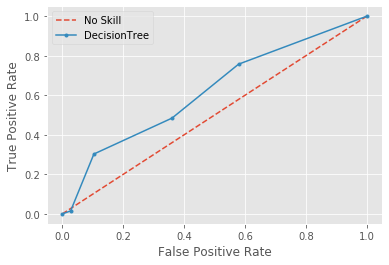

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = americas_next_top_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTree: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Confusion Matrix

In [16]:
y_pred = americas_next_top_model.predict(X_test)

confused = confusion_matrix(y_test, y_pred)
# Assigning columns names
confused_cute = pd.DataFrame(confused, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

# Creating a function to report confusion metrics, note that this code is adopted from source listed in references
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

# Showing the confusion matrix
print(confused_cute)

                 Predicted Negative  Predicted Positive
Actual Negative                 164                  19
Actual Positive                  46                  20


In [17]:
# showing metrics of confusion
stats = confusion_metrics(confused)

--------------------------------------------------
Accuracy: 0.74
Mis-Classification: 0.26
Sensitivity: 0.3
Specificity: 0.9
Precision: 0.9
f_1 Score: 0.45


## What Are the Most Important Features?

In [18]:
antm = americas_next_top_model
importances = antm.feature_importances_
indices = np.argsort(importances)[::-1] # list the features in order from most to least important

In [19]:
features = X.columns
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 53 (0.320104)
2. feature 5 (0.270468)
3. feature 49 (0.217380)
4. feature 23 (0.192048)
5. feature 56 (0.000000)
6. feature 13 (0.000000)
7. feature 24 (0.000000)
8. feature 22 (0.000000)
9. feature 21 (0.000000)
10. feature 20 (0.000000)
11. feature 19 (0.000000)
12. feature 18 (0.000000)
13. feature 17 (0.000000)
14. feature 16 (0.000000)
15. feature 15 (0.000000)
16. feature 14 (0.000000)
17. feature 11 (0.000000)
18. feature 12 (0.000000)
19. feature 26 (0.000000)
20. feature 10 (0.000000)
21. feature 9 (0.000000)
22. feature 8 (0.000000)
23. feature 7 (0.000000)
24. feature 6 (0.000000)
25. feature 4 (0.000000)
26. feature 3 (0.000000)
27. feature 2 (0.000000)
28. feature 1 (0.000000)
29. feature 25 (0.000000)
30. feature 28 (0.000000)
31. feature 27 (0.000000)
32. feature 41 (0.000000)
33. feature 54 (0.000000)
34. feature 52 (0.000000)
35. feature 51 (0.000000)
36. feature 50 (0.000000)
37. feature 48 (0.000000)
38. feature 47 (0.000000)
39. feature 46 (0.000000)
40. 

In [25]:
best_indices = indices[:16]
best_indices

array([53,  5, 49, 23, 56, 13, 24, 22, 21, 20, 19, 18, 17, 16, 15, 14],
      dtype=int64)

Text(0.5, 0, 'Relative Importance')

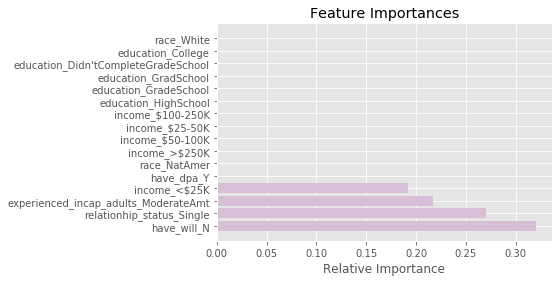

In [26]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(best_indices)), importances[best_indices], color='thistle', align='center')
plt.yticks(range(len(best_indices)), features[best_indices])
plt.xlabel('Relative Importance')

## What Is the Decision Tree Rule?

In [27]:
print(americas_next_top_model.get_n_leaves())
print(americas_next_top_model.get_depth())

5
3


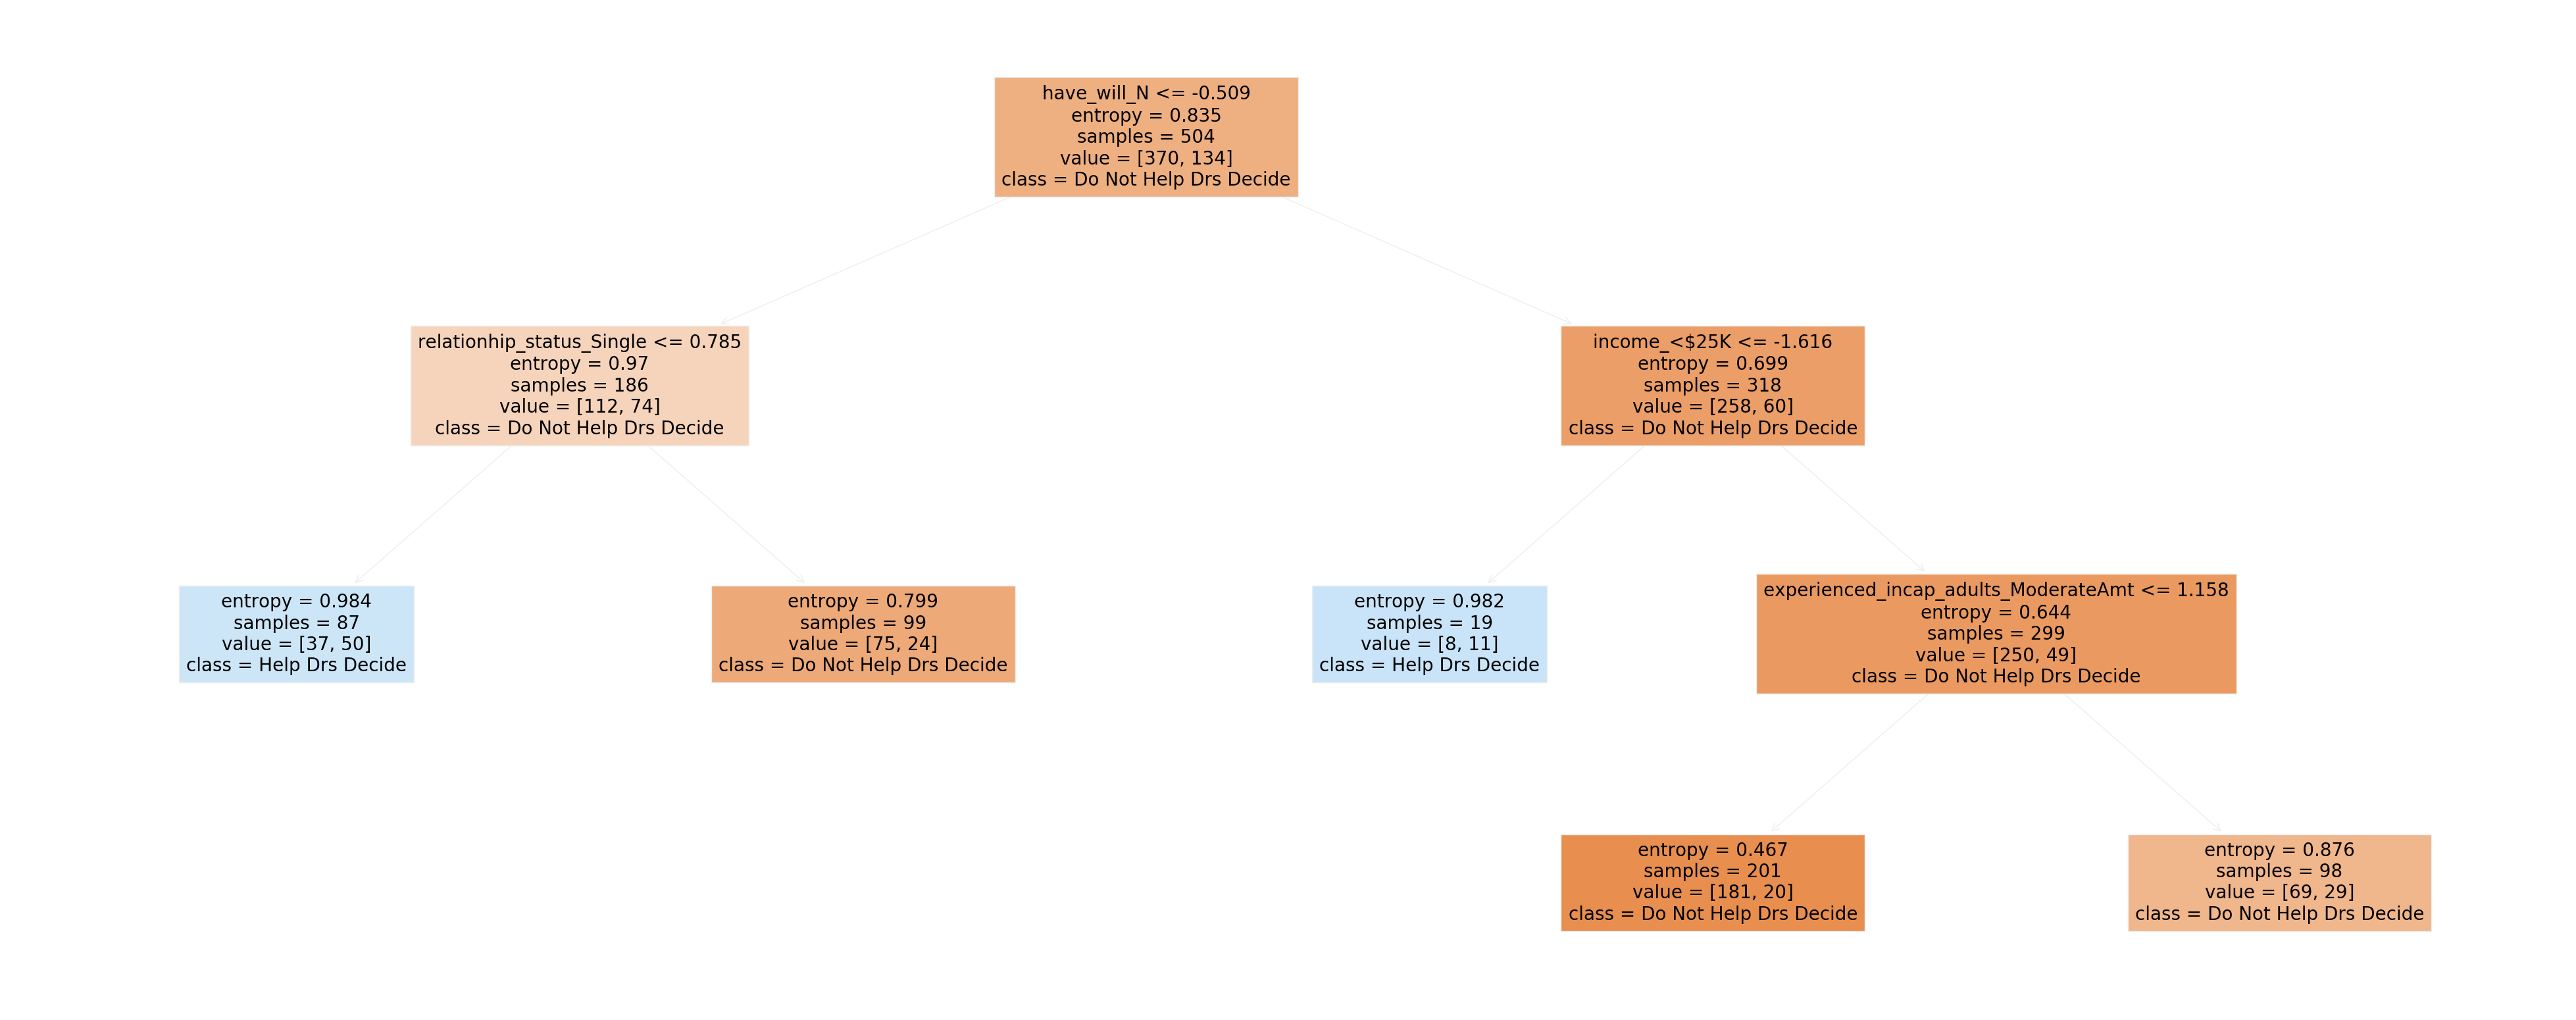

In [28]:
from sklearn import tree
labels = ['Do Not Help Drs Decide', 'Help Drs Decide']
features = list(X)
 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,10), dpi=200)
tree.plot_tree(americas_next_top_model, 
               feature_names = features, 
               class_names= labels,
               filled=True,
               rotate=True,
              fontsize=10);
fig.savefig('decisiontreerule.png')

# **Conclusion**

## Reminder of Background

**Can we somehow figure out which process a particular patient prefers?**
- receiving desired and avoiding undesired treatments, or
- involving their family

*(Given that those goals are often at odds with each other.)*

### Problem Statement: Can we predict which patients prioritize involving their family over receiving preferred treatments?

**The short answer is no.** (Note that the following stats are from real data model):

- ROC AUC: is a measure of how well a model can separate classes. An AUC of 0.5 means that the model cannot tell between 2 classes at all. Our model's AUC was 0.562. :(
- Sensitivity (True Positive Rate): 88% of people who DO want their family involved in treatment decision-making were predicted to want them involved. 
- Specificity (True Negative Rate): 13% of people who DO NOT want their family involved in treatment decision-making were predicted to NOT want them involved.



